## 4.3. Erros na interpolação 

#### Um limitante superior para o erro usando a fórmula de Lagrange

([Burden,2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/136)) Se $x_0, x_1, \ldots, x_n$ são $n+1$ números distintos, e $f$ é uma função cujos valores são dados por esses números, então existe um único polinômio $P(x)$ de grau no máximo $n$ 

$$
f\left(x_k\right)=P\left(x_k\right), \quad \text { para cada } k=0,1, \ldots, n .
$$


Esse polinômio é dado por

$$
P(x)=f\left(x_0\right) L_{n, 0}(x)+\cdots+f\left(x_n\right) L_{n, n}(x)=\sum_{k=0}^n f\left(x_k\right) L_{n, k}(x),
$$

onde, para cada $k=0,1, \ldots, n$,

$$
\begin{aligned}
L_{n, k}(x) & =\frac{\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_{k-1}\right)\left(x-x_{k+1}\right) \cdots\left(x-x_n\right)}{\left(x_k-x_0\right)\left(x_k-x_1\right) \cdots\left(x_k-x_{k-1}\right)\left(x_k-x_{k+1}\right) \cdots\left(x_k-x_n\right)} \\
& =\prod_{\substack{i=0 \\
i \neq k}}^n \frac{\left(x-x_i\right)}{\left(x_k-x_i\right)}
\end{aligned}
$$


Um esboço do gráfico de um típico $L_{n, k}$ quando $n$ é par é mostrado na Figura 4.3.1.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/4_INTERPOLACAO_POLINOMIAL/imagens/polinomio_Lk.png" width="800">

Figura 4.3.1 - Gráfico de um típico $L_{n, k}$ quando $n$ é par ([Burden,2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/136)).

Já vimos que essa fórmula é conhecida como *polinômio interpolados de Lagrange*.

O próximo passo é calcular um resto ou limitante para o erro envolvido na aproximação de uma função por um polinômio interpolador.

Suponha que $x_0, x_1, \ldots, x_n$ sejam números distintos no intervalo $[a, b]$ e que $f \in$ $C^{n+1}[a, b]$. Então, para cada $x$ em $[a, b]$, existe umnúmero $\xi(x)$ (geralmente desconhecido) entre $\min \left\{x_0, x_1, \ldots, x_n\right\}$, e o $\max \left\{x_0, x_1, \ldots, x_n\right\}$ e consequentemente em $(a, b)$, com

$$f(x)=P(x)+\frac{f^{(n+1)}(\xi(x))}{(n+1)!}\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_n\right)$$
onde $P(x)$ é o polinômio interpolador $P(x)=\sum_{k=0}^n f\left(x_k\right) L_{n, k}(x)$,

A demonstração desse resultado pode ser vista em [Burden (2016, p. 138)](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/138).

**Exemplo 4.3.1:** Vamos usar os pontos com $x_0=2, x_1=2,75$ e $x_2=4$ para determinar o polinômio de Lagrange de grau 2 que aproxima a função $f(x)=\frac{1}{x}$. Em seguida vamos determinar o erro máximo  quando o polinômio for usado para aproximar $f(x)$ com $x \in [2,4]$.

*Solução:* Primeiramente determinamos os coeficientes polinomiais $L_0(x), L_1(x)$ e $L_2(x)$.

$$
\begin{aligned}
& L_0(x)=\frac{(x-2,75)(x-4)}{(2-2,75)(2-4)}=\frac{2}{3}(x-2,75)(x-4) \\
& L_1(x)=\frac{(x-2)(x-4)}{(2,75-2)(2,75-4)}=-\frac{16}{15}(x-2)(x-4)
\end{aligned}
$$

$$
L_2(x)=\frac{(x-2)(x-2,75)}{(4-2)(4-2,75)}=\frac{2}{5}(x-2)(x-2,75)
$$

Além disso, tem-se $f\left(x_0\right)=f(2)=1 / 2, f\left(x_1\right)=f(2,75)=4 / 11$ e $f\left(x^2\right)=f(4)=1 / 4$, de modo que

$$
\begin{aligned}
P(x) & =\sum_{k=0}^2 f\left(x_k\right) L_k(x) \\
& =\frac{1}{3}(x-2,75)(x-4)-\frac{64}{165}(x-2)(x-4)+\frac{1}{10}(x-2)(x-2,75) \\
& =\frac{1}{22} x^2-\frac{35}{88} x+\frac{49}{44}
\end{aligned}
$$

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 4]
import numpy as np

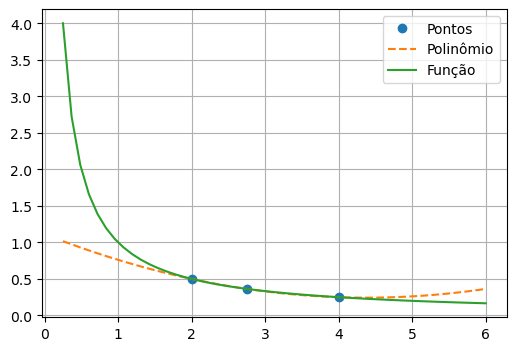

In [2]:
xi = np.array([2, 2.75, 4])
yi =1/xi

x = np.linspace(0.25,6)
y = (1/22)*x**2 - (35/88)*x + 49/44

plt.plot(xi,yi,'o', label='Pontos')
plt.plot(x,y,'--', label='Polinômio')
plt.plot(x,1/x,'-', label='Função')
plt.legend()
plt.grid()

Para estimar o erro máximo, vamos primeiramente obter as derivadas de $f(x)=x^{-1}$ fazendo

$$
f^{\prime}(x)=-x^{-2}, \quad f^{\prime \prime}(x)=2 x^{-3} \quad \text { e } \quad f^{\prime \prime \prime}(x)=-6 x^{-4}
$$

Assim, a fórmula do erro fornece

$$
\frac{f^{\prime \prime \prime}(\xi(x))}{3!}\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)=-(\xi(x))^{-4}(x-2)(x-2,75)(x-4), \quad \text { para } \xi(x) \text { em }(2,4)
$$


O valor máximo de $(\xi(x))^{-4}$ no intervalo é $2^{-4}=1 / 16$. Precisamos agora determinar o valor máximo neste intervalo do valor absoluto do polinômio

$$
g(x)=(x-2)(x-2,75)(x-4)=x^3-\frac{35}{4} x^2+\frac{49}{2} x-22.
$$



Já que

$$
\frac{d}{dx} \left(x^3-\frac{35}{4} x^2+\frac{49}{2} x-22\right)=3 x^2-\frac{35}{2} x+\frac{49}{2}=\frac{1}{2}(3 x-7)(2 x-7),
$$

os pontos críticos ocorrem em

$$
x=\frac{7}{3}, \operatorname{com} g\left(\frac{7}{3}\right)=\frac{25}{108}, \quad \text { e } \quad x=\frac{7}{2}, \operatorname{com} g\left(\frac{7}{2}\right)=-\frac{9}{16} .
$$


Assim, o erro máximo é

$$
\frac{f^{\prime \prime \prime}(\xi(x))}{3!}\left|\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)\right| \leq \frac{1}{16}\left|-\frac{9}{16}\right|=\frac{9}{256} \approx 0,03515625 .
$$


**Exemplo 4.3.2:** Considerando o polinômio de Lagrange que aproxima a função $f(x)=1/x$ no intervalo $[2,4]$ pelos pontos $x_0=2, x_1=2,75$ e $x_2=4$. Vamos agora usar a função `calculaP` para calcular o valor numérico do polinômio **sem obter a expressão do polinômio** e verificar o erro em um conjunto de 21 pontos igualmente espaçados o londo do intervalo. Vamos verificar se o erro não ultrapassa o valor estimado no Exemplo 4.3.1.

In [3]:
def calculaP(x,X,Y):
    valor = 0
    for k in range(len(X)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

In [4]:
xp = np.linspace(2,4,21)
yp = 1/xp
pi = []
for x in xp:
    pi.append(calculaP(x, xi, yi))
pi = np.array(pi)

In [5]:
erro = pi-yp
print(erro)

[ 0.          0.00267316  0.00409091  0.00453557  0.00424242  0.00340909
  0.0022028   0.00076599 -0.00077922 -0.00232759 -0.00378788 -0.00508065
 -0.00613636 -0.00689394 -0.00729947 -0.00730519 -0.00686869 -0.00595209
 -0.00452153 -0.00254662  0.        ]


In [6]:
abs(erro).max()

0.007305194805194759

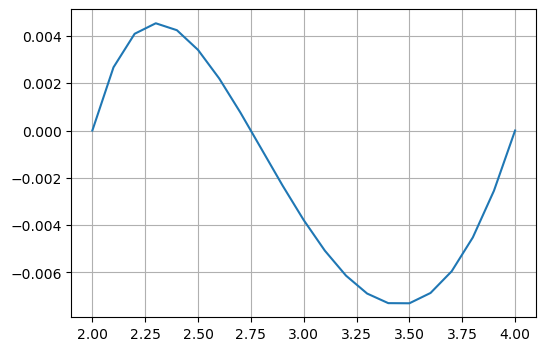

In [7]:
plt.plot(xp, erro)
#plt.plot(xp, yp)
#plt.plot(xp,pi)
plt.grid()

#### Uma estimativa para o erro usando a fórmula de Newton de diferenças divididas


O polinômio interpolador de Newton é dado por 


$$P(x)=f[x_0]+(x-x_0)f[x_0,x_1]+(x-x_0)(x-x_1)f[x_0,x_1,x_2]+...$$
$$...+(x-x_0)(x-x_1)...(x-x_{n-1})f[x_0,...,x_n]$$


onde $f[x_0]$, $f[x_0,x_1]$,...,$f[x_0,...,x_n]$ são as *diferenças divididas**

Uma tabela de diferenças divididas é mostrado na Figura 4.3.2.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/4_INTERPOLACAO_POLINOMIAL/imagens/tabela_dd.png" width="800">

Figura 4.3.2 - Tabela de diferenças divididas de Newton (Fonte: [Chapra, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/455)) 

([Chapra, 2016, p. 455](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/455)) Para um polinômio interpolador de grau $n$, uma fórmula para o erro é dada por 

$$
R_n=\frac{f^{(n+1)}(\xi)}{(n+1)!}\left(x-x_0\right)\left(x-x_1\right) \ldots\left(x-x_n\right)
$$

onde $\xi$ é algum ponto no intervalo contendo a variável e os dados. Para essa fórmula ser útil, a função em questão deve ser conhecida e $(n + 1)$ vezes diferenciável. **Em geral, esse não é o caso**. Felizmente, está disponível uma formulação alternativa que não requer conhecimento anterior da função. Em vez disso, ela usa diferenças divididas finitas para aproximar a $(n + 1)$-ésima derivada,
$$
R_n=f\left[x, x_n, x_{n-1}, \ldots, x_0\right]\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_n\right)
$$

onde $f\left[x, x_n, x_{n-1}, \ldots, x_0\right]$ é a $(n+1)$-ésima diferença dividida finita. 

Como esta expressão contém a incógnita $f(x)$, ela não determina o erro. Entretanto, se estiver disponível um ponto dado adicional $f(x_{n+1})$, a equação pode ser usada para estimar o erro, como em
$$
R_n \cong f\left[x_{n+1}, x_n, x_{n-1}, \ldots, x_0\right]\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_n\right)
$$

**Exemplo 4.3.3:** ([Chapra, 2016, p. 451](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/451)) 
Ajuste um polinômio de segundo grau aos três pontos da função $f(x)=ln(x)$ dados, e use o polinômio para estimar $ln(2)$. Calcule o erro absoluto.

Pontos:
$$
\begin{array}{ll}
x_0=1 & f\left(x_0\right)=0 \\
x_1=4 & f\left(x_1\right)=1,386294 \\
x_2=6 & f\left(x_2\right)=1,791759
\end{array}
$$

$f[x_0]=0$

$f[x_0,x_1]=\frac{1,386294-0}{4-1}=0,4620981$

$ f[x_0,x_1,x_2]=\frac{\frac{1,791759-1,386294}{6-4}-0,4620981}{6-1}=-0,0518731$

Substituindo os os valores obtidos para as diferenças divididas na fórmula de Newton, obtemos o polinômio


$$
\begin{array}{rl}
P_2(x)= & 0+0,4620981(x-1)-0,0518731(x-1)(x-4)\\
      = &-0.0518731x^2 + 0.7214636x - 0.6695905
\end{array}
$$

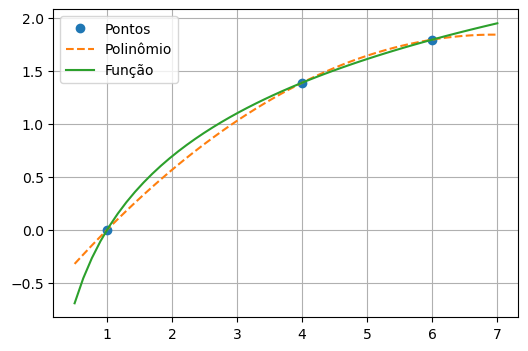

In [8]:
xi = np.array([1, 4, 6])
yi = np.log(xi)

x = np.linspace(0.5,7)
y = -0.0518731*x**2 + 0.7214636*x - 0.6695905

plt.plot(xi,yi,'o', label='Pontos')
plt.plot(x,y,'--', label='Polinômio')
plt.plot(x,np.log(x),'-', label='Função')
plt.legend()
plt.grid()

In [9]:
x = 2
p2 = -0.0518731*x**2 + 0.7214636*x - 0.6695905
print('P(2) =',p2)

P(2) = 0.5658443


In [10]:
print('Erro absoluto =',abs(p2-np.log(2)))

Erro absoluto = 0.12730288055994532


Agora, adicionando um quarto ponto $x_3 = 5$ , $f(x_3) = 1,609438$, vamos obter uma estimativa do erro para o polinômio interpolador de segundo grau fazendo

$$
R_2=f\left[x_3, x_2, x_1, x_0\right]\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)
$$
Para isso vamos precisar calcular as diferenças divididas incluindo o ponto $x_3$:

In [11]:
def difdiv(x,y):
    m = len(x)
    dd = y.copy()
    for k in range(1,m):
        dd[k:m]=(dd[k:m]-dd[k-1])/(x[k:m]-x[k-1])
    return dd

In [12]:
xi = np.array([1, 4, 5, 6])
yi = np.log(xi)
print(difdiv(xi, yi))

[ 0.          0.46209812 -0.05973864  0.00786553]


Assim,  $f[x_0,x_1,x_2, x_3]=0,00786553$. Então podemos escrever

$$
R_2=0,007865529(x-1)(x-4)(x-6)
$$

onde o valor da diferença dividida finita de terceira ordem é como calculado usando a função `difdiv` desenvolvida anteriormente. Essa relação pode ser calculada em $x=2$ por

$$
R_2=0,007865529(2-1)(2-4)(2-6)=0,0629242
$$

que é da mesma ordem de grandeza que o erro verdadeiro ([Chapra, 2016, p. 455](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/455)) .

Por exemplo, arredondando com uma casa decimal obtemos: 

In [13]:
np.round(0.0629242,1)

0.1

In [14]:
np.round(0.12730288055994532,1)

0.1

**Exercícios:**

**1.** Para as funções $f(x)$ dadas, construa polinômios interpoladores de graus entre 2 e 5 para determinar uma aproximação de $f(0,45)$ e encontre o erro absoluto. Encontre uma estimativa para o erro.

a) $f(x)=\cos x$

b) $f(x)=\sqrt{1+x}$

c) $f(x)=\ln (x+1)$

d) $f(x)=\operatorname{tg} x$

**2.** Para as funções $f(x)$, construa polinômios interpoladores de graus entre 2 e 5 para determinar uma aproximação de $f(1,4)$, e encontre o erro absoluto. Encontre uma estimativa para o erro.

a) $f(x)=\operatorname{sen} \pi x$

b) $f(x)=\sqrt[3]{x-1}$

c) $f(x)=\log _{10}(3 x-1)$

d) $f(x)=e^{2 x}-x$

**3.** ([Burden, 2016, p. 125](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/141)) Utilize polinômios interpoladores de Lagrange de graus dois e três adequados para aproximar cada um dos seguintes:

a) $f(8,4)$ se $f(8,1)=16,94410, f(8,3)=17,56492, f(8,6)=18,50515, f(8,7)=18,82091$

b) $f\left(-\frac{1}{3}\right)$ se $f(-0,75)=-0,07181250, f(-0,5)=-0,02475000, f(-0,25)=0,33493750, f(0)= 1,10100000$

c) $f(0,25)$ se $f(0,1)=0,62049958, f(0,2)=-0,28398668, f(0,3)=0,00660095, f(0,4)=0,24842440$

d) $f(0,9)$ se $f(0,6)=-0,17694460, f(0,7)=0,01375227, f(0,8)=0,22363362, f(1,0)=0,65809197$

e) $f(0,43)$ se $f(0)=1, f(0,25)=1,64872, f(0,5)=2,71828, f(0,75)=4,48169$

f) $f(0)$ se $f(-0,5)=1,93750, f(-0,25)=1,332303, f(0,25)=0,800781, f(0,5)=0,687500$

g) $f(0,18)$ se $f(0,1)=-0,29004986, f(0,2)=-0,56079734, f(0,3)=-0,81401972, f(0,4)=$ $-1,0526302$

h) $f(0,25)$ se $f(-1)=0,86199480, f(-0,5)=0,95802009, f(0)=1,0986123, f(0,5)=1,2943767$

**4.**  ([Burden, 2016, p. 125](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/141)) Os dados do Exercício 3 foram gerados a partir das funções a seguir. Use a fórmula de erro para encontrar um limitante para o erro e compare o limitante ao erro real para os polinômiod de grau 2

a) $f(x)=x \ln x$

b) $f(x)=x^3+4,001 x^2+4,002 x+1,101$

c) $f(x)=x \cos x-2 x^2+3 x-1$

d) $f(x)=\operatorname{sen}\left(e^x-2\right)$

e) $f(x)=e^{2 x}$

f) $f(x)=x^4-x^3+x^2-x+1$

g) $f(x)=x^2 \cos x-3 x$

h) $f(x)=\ln \left(e^x+2\right)$
